In [ ]:
import numpy as np
import pandas as pd
import re
import nltk

In [22]:
train_df = pd.read_csv('/content/drive/MyDrive/train_data.txt', sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
test_df = pd.read_csv('/content/drive/MyDrive/test_data.txt', sep = ':::', names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')
test_sol = pd.read_csv('/content/drive/MyDrive/test_data_solution.txt' ,sep = ':::', names = ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'],engine='python')

EXPLORATORY DATA ANALYSIS

In [15]:
train_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [23]:
test_df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [24]:
test_sol.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           54200 non-null  int64  
 1   TITLE        54200 non-null  object 
 2   GENRE        54200 non-null  object 
 3   DESCRIPTION  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
test_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   GENRE        54200 non-null  object
 3   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [28]:
train_df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [29]:
test_df.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [30]:
test_sol.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [31]:
train_df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [32]:
test_df.describe()

,ID,DESCRIPTION
count,54200.000000,0.0
mean,27100.500000,NaN
std,15646.336632,NaN
min,1.000000,NaN
25%,13550.750000,NaN
50%,27100.500000,NaN
75%,40650.250000,NaN
max,54200.000000,NaN


In [33]:
test_sol.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [34]:
train_df.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [35]:
test_df.isnull().sum()

ID                 0
TITLE              0
GENRE              0
DESCRIPTION    54200
dtype: int64

In [36]:
test_sol.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [37]:
train_df['GENRE'].value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [38]:
train_df['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

DATA VISUALISATION

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='GENRE'>

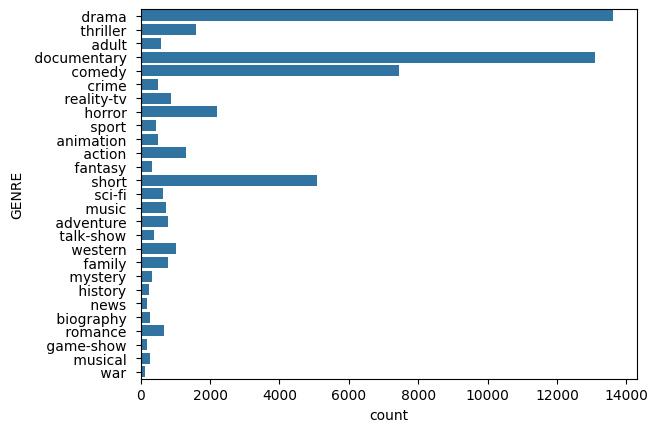

In [44]:
sns.countplot(train_df['GENRE'])

Drama has the highest value count

<ipython-input-45-6d42507c691b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_genres_df, x='GENRE', order=top_genres, palette='viridis')


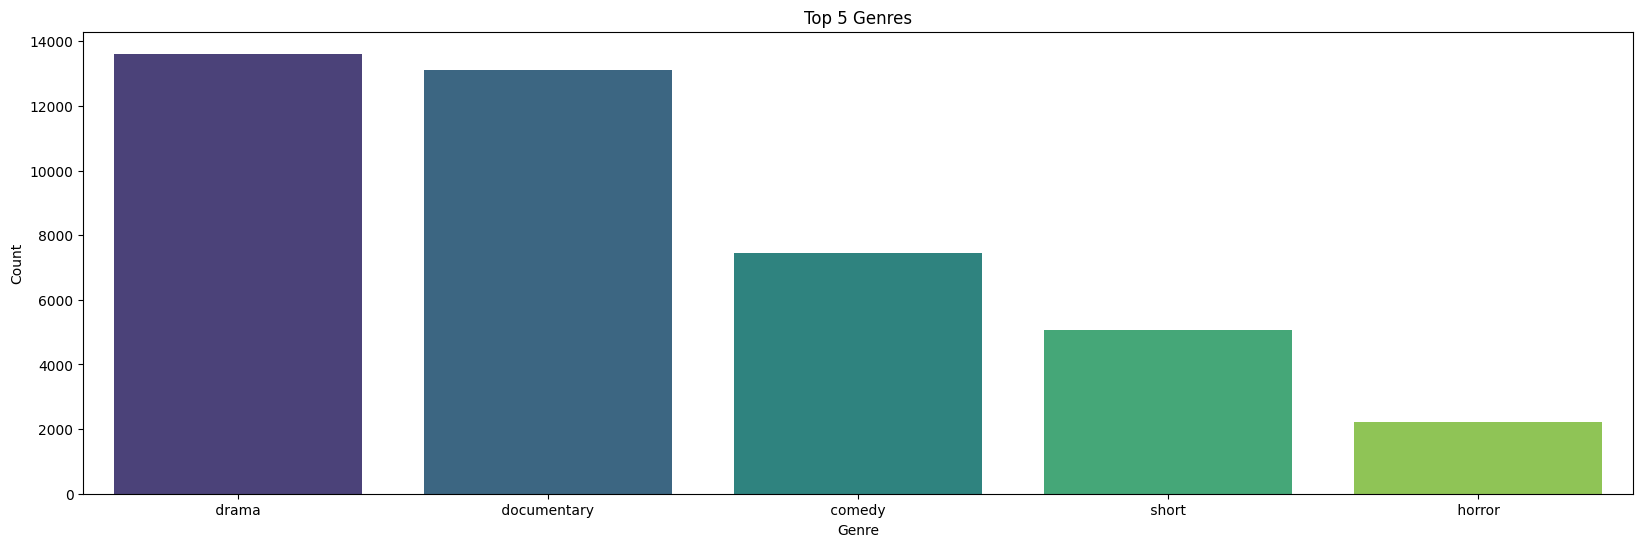

In [45]:
top_genres = train_df['GENRE'].value_counts().nlargest(5).index
top_genres_df = train_df[train_df['GENRE'].isin(top_genres)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_genres_df, x='GENRE', order=top_genres, palette='viridis')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

TOP 5 GENRES RANKING

<ipython-input-46-ad6bef047b94>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_genres_df, x='GENRE', order=top_genres, palette='viridis')


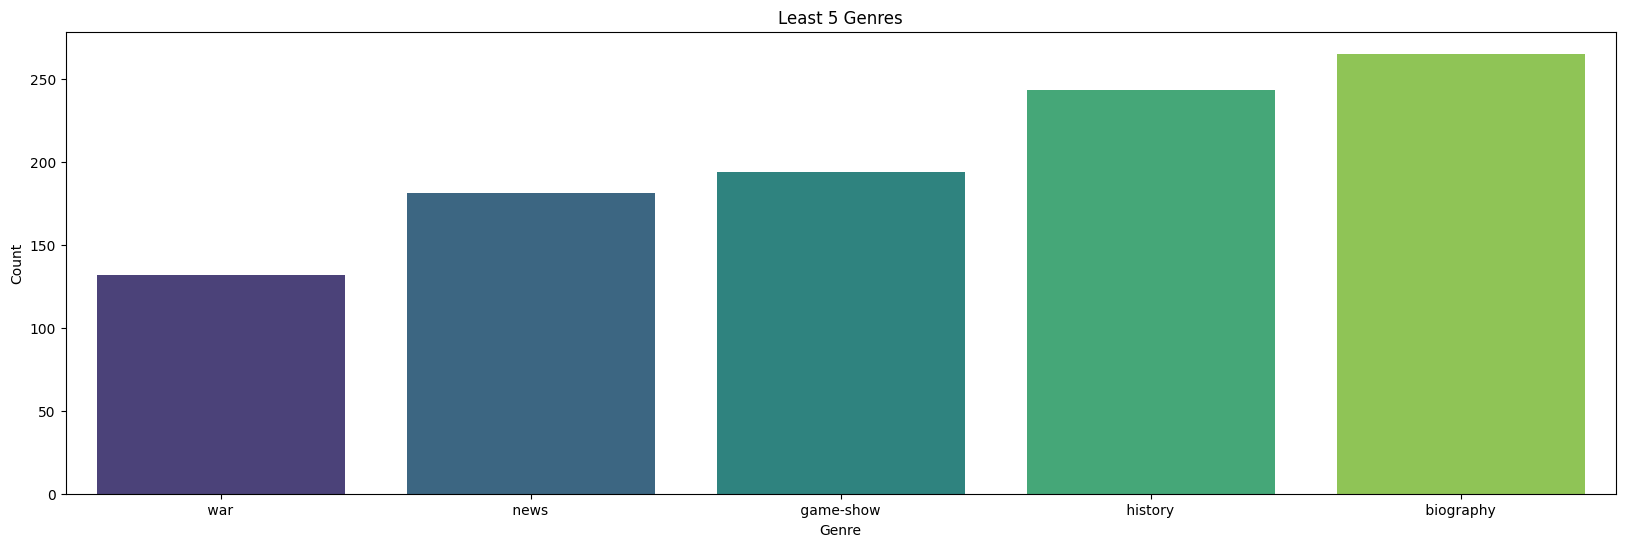

In [46]:
top_genres = train_df['GENRE'].value_counts().nsmallest(5).index
top_genres_df = train_df[train_df['GENRE'].isin(top_genres)]
plt.figure(figsize=(20,6))
sns.countplot(data=top_genres_df, x='GENRE', order=top_genres, palette='viridis')
plt.title('Least 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

LEAST 5 GENRES RANKING

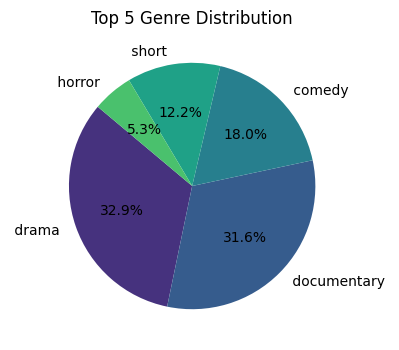

In [47]:
genre_counts = train_df['GENRE'].value_counts().nlargest(5)
colors = sns.color_palette('viridis')[0:len(genre_counts)]
plt.figure(figsize=(6,4))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Genre Distribution')
plt.show()

ENCODING AND TRANSFORMING DATA

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [49]:
tfidf = TfidfVectorizer()
le = LabelEncoder()

In [50]:
xtrain = tfidf.fit_transform(train_df['DESCRIPTION'])

In [57]:
ytrain = le.fit_transform(train_df['GENRE'])
ytest = le.fit_transform(test_sol['GENRE'])

In [58]:
ytrain

array([ 8, 24,  1, ...,  7,  5, 12])

In [61]:
xtrain

<54214x121110 sparse matrix of type '<class 'numpy.float64'>'
	with 3731486 stored elements in Compressed Sparse Row format>

Splitting the data into train and test

In [60]:
from sklearn.model_selection  import train_test_split
Xtrain, Xtest, Ytrain , Ytest = train_test_split(xtrain, ytrain, test_size = 0.2, random_state= 42)


In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(Xtest)
accuracy_score(Ytest, ypred)

0.5886747210181684

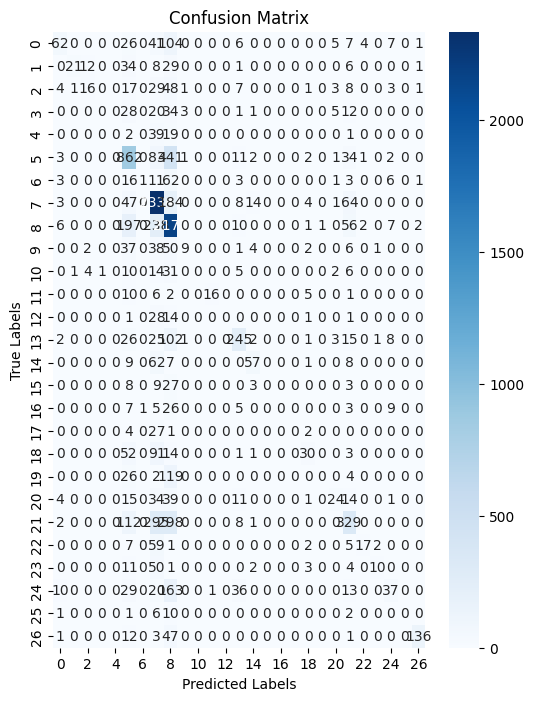

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, ypred)
plt.figure(figsize=(6,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Testing the model

In [72]:
def predict(description):
  description = tfidf.transform([description])
  prediction = lr.predict(description)
  return le.inverse_transform(prediction)[0]

user_input = input("Enter movie description")
predicted_genre = predict(user_input)
print("predicted genre is: ", predicted_genre)

Enter movie descriptionListening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.
predicted genre is:   drama 
